In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
from tensorflow.keras.preprocessing.image import load_img
from tqdm.notebook import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")  # Correct argument
        img = np.array(img, dtype=np.float32)  # Convert to NumPy array with float32 dtype
        features.append(img)

    features = np.array(features)  # Convert list to NumPy array
    features = features.reshape(len(features), 48, 48, 1)  # Ensure correct shape
    return features

In [8]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [9]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [10]:
x_train = train_features/255.0
x_test = test_features/255.0

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [13]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [15]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [17]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.2353 - loss: 1.8385 - val_accuracy: 0.2632 - val_loss: 1.8035
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.2614 - loss: 1.7861 - val_accuracy: 0.3264 - val_loss: 1.6862
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 479s 2s/step - accuracy: 0.3345 - loss: 1.6579 - val_accuracy: 0.4353 - val_loss: 1.4815
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.4043 - loss: 1.5338 - val_accuracy: 0.4662 - val_loss: 1.3857
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - accuracy: 0.4330 - loss: 1.4543 - val_accuracy: 0.4867 - val_loss: 1.3454
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.4587 - loss: 1.4063 - val_accuracy: 0.5153 - val_loss: 1.2847
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.4845 - loss: 1.3525 - val_accuracy: 0.5224 - val_loss: 1.2584
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.4883 - loss: 1.3312 - 

KeyboardInterrupt: 

In [19]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")

In [20]:
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.keras")

C:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [21]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [24]:
def ef(image):
    img = load_img(image, color_mode="grayscale", target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [27]:
image = 'images/train/happy/25.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
model prediction is  happy


original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
model prediction is  happy


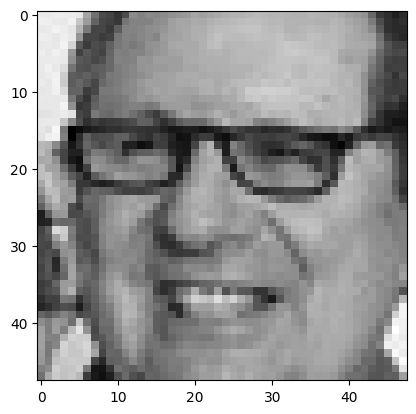

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
image = 'images/train/happy/28.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
model prediction is  fear


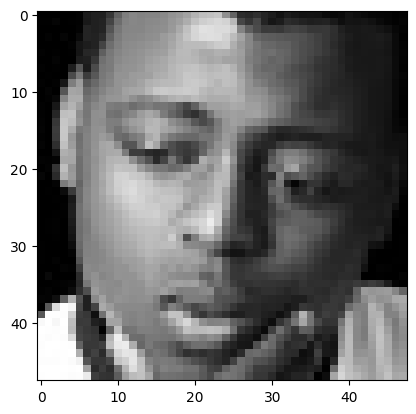

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
image = 'images/train/fear/106.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
model prediction is  disgust


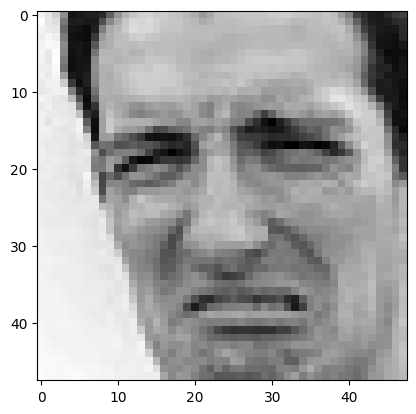

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
image = 'images/train/disgust/416.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
print("Thankyou")